In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("../milknew.csv")
df.shape

(1059, 8)

In [26]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [27]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [29]:
# remove strnig space.
df.rename(columns=lambda x: x.strip(), inplace = True)

In [30]:
# check for missing vlaue 
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

**No missing value existed.**

### Step 1: Normalization

In [31]:
from sklearn import preprocessing
       
print("*** Before Normalization: \n", df)
# quantitative columns to be normalized
quantitative_columns = ["pH", "Temprature", "Colour"]
min_max_scaler = preprocessing.MinMaxScaler()

# normalization
df[quantitative_columns] = min_max_scaler.fit_transform(df[quantitative_columns])
print("*** After Normalization: \n", df)

*** Before Normalization: 
        pH  Temprature  Taste  Odor  Fat  Turbidity  Colour   Grade
0     6.6          35      1     0    1          0     254    high
1     6.6          36      0     1    0          1     253    high
2     8.5          70      1     1    1          1     246     low
3     9.5          34      1     1    0          1     255     low
4     6.6          37      0     0    0          0     255  medium
...   ...         ...    ...   ...  ...        ...     ...     ...
1054  6.7          45      1     1    0          0     247  medium
1055  6.7          38      1     0    1          0     255    high
1056  3.0          40      1     1    1          1     255     low
1057  6.8          43      1     0    1          0     250    high
1058  8.6          55      0     1    1          1     255     low

[1059 rows x 8 columns]
*** After Normalization: 
             pH  Temprature  Taste  Odor  Fat  Turbidity    Colour   Grade
0     0.553846    0.017857      1     0   

In [32]:
# Features predictors
X = df.drop("Grade", axis = 1)
# Tagret variable
y = df["Grade"]

In [33]:
# split the data for train and test 
from sklearn.model_selection import train_test_split

# train = 70% and test = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84, stratify=y)

# check the size of test and train for clearity.
print(X_train.shape)
print(X_test.shape)

(741, 7)
(318, 7)


### Step 2: Resampling.

In [34]:
# k-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialize StratifiedKFold for k-fold cross-validation with 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=66)
# Intialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5) 
# accuracy array for the folds.
fold_accuracies = []

print("K-Fold Cross-Validation:")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    # split the data into train and validation sets
    X_train_fold = X_train.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    # validation set.
    X_val_fold = X_train.iloc[val_index]
    y_val_fold = y_train.iloc[val_index]
    
    # Train the KNN model with the training data for this fold
    knn_model.fit(X_train_fold, y_train_fold)
    
    # Use the trained model to make predictions on the validation set
    y_val_pred = knn_model.predict(X_val_fold)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    # add the accuracy for this fold to the list.
    fold_accuracies.append(accuracy)
    
    print(f"Number {fold + 1} Fold has the accuracy: {accuracy:.2f}")

# Compute the average accuracy.
average_accu = sum(fold_accuracies) / len(fold_accuracies)
print(f"The average K-Fold Cross-Validation Accuracy is: {average_accu:.2f}")

K-Fold Cross-Validation:
Number 1 Fold has the accuracy: 0.99
Number 2 Fold has the accuracy: 0.99
Number 3 Fold has the accuracy: 1.00
Number 4 Fold has the accuracy: 0.98
Number 5 Fold has the accuracy: 0.97
The average K-Fold Cross-Validation Accuracy is: 0.99


**Accuracy is quite high, so the KNN Model should work for the dataset**

### Step 3: Create the KNN Model for entire train data set.

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

# trian the model
knn_model.fit(X_train, y_train)

# predict the model
KNN_Model_Prediction = knn_model.predict(X_test)

# print the model first 10 prediction for checking value consistency
print(KNN_Model_Prediction.tolist()[0:10])

# print the accuracy with real y value with the prediction.
model_accuracy = accuracy_score(y_test, KNN_Model_Prediction)
print(f"The model accuracy is {model_accuracy}")

['low', 'low', 'low', 'low', 'low', 'low', 'high', 'medium', 'high', 'low']
The model accuracy is 0.9685534591194969


### Step 4: Tuning the hyperparameters

In [36]:
# use grid search with cross validation to get the optimal value for the k parameter
from sklearn.model_selection import GridSearchCV

# only test the value of hyperparamter for k from 1 to 20
param_grid = {"n_neighbors": range(1,21)}

# an empty knn model without the hyperparameter
knn = KNeighborsClassifier()

# grid search with cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring = "accuracy", verbose = 1, n_jobs= -1) # verbose and n_jobs are optional to show the progress and reduce the time of running
grid_search.fit(X_train, y_train)

# optimal value 
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_neighbors': 1}
0.9972972972972972


### Input the optiaml hyperparameter into the model to see the accuracy

In [37]:
# use the optimal value for the model creation 
from sklearn.metrics import confusion_matrix, classification_report
optimal_knn_model = KNeighborsClassifier(n_neighbors=1)
normal_knn_model = KNeighborsClassifier()
# fit the model
optimal_knn_model.fit(X_train, y_train)

# # predict the test set
y_pred_optimal = optimal_knn_model.predict(X_test)

# # evaluate the model
accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy: {accuracy}\n")

# # confusion matrix
matrix = confusion_matrix(y_test, y_pred_optimal)
print("Confusion Matrix:")
print(matrix)

# # classification report
report = classification_report(y_test, y_pred_optimal)
print("\nClassificaiton Report:")
print(report)

# fit the model
normal_knn_model.fit(X_train, y_train)

# # predict the test set
y_pred_normal = normal_knn_model.predict(X_test)

# # evaluate the model
accuracy = accuracy_score(y_test, y_pred_normal)
print(f"Accuracy: {accuracy}\n")

Accuracy: 0.9905660377358491

Confusion Matrix:
[[ 77   0   0]
 [  3 126   0]
 [  0   0 112]]

Classificaiton Report:
              precision    recall  f1-score   support

        high       0.96      1.00      0.98        77
         low       1.00      0.98      0.99       129
      medium       1.00      1.00      1.00       112

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Accuracy: 0.9685534591194969



### Result Evaluation and Visualization

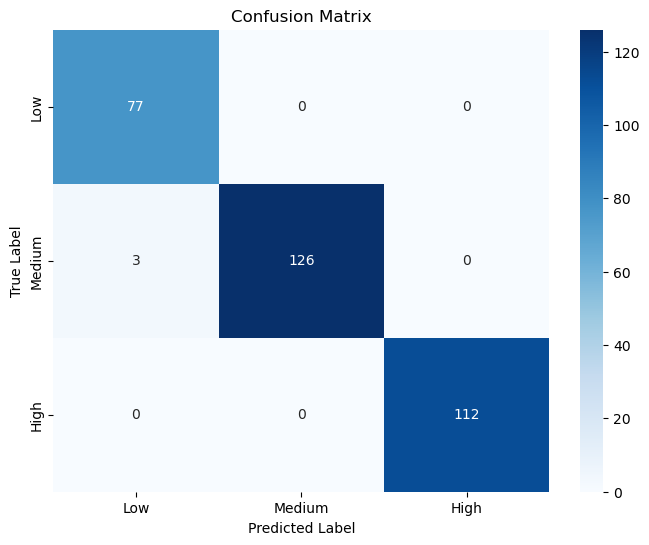

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
# test the trained model 
test_inputs = [0.56, 0.2, 1, 1, 0, 0, 0.466]

prediction = optimal_knn_model.predict([test_inputs])

print(prediction)

['medium']


g:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
